# Monte Carlo: Statistical data analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Error estimates for Markov chains

## Dilema
* Want each run to be as long as possible.
* Want number of runs to be as large as possible.
* What is the best compromise between the length of each run and the number of runs.

## Data analysis for independent variables
For $\xi_i, i \in (1,2,3,\dots, N)$, we have
$$
  \langle \xi \rangle = \frac{1}{N} \sum_{i=1}^N \xi_i \pm \frac{\sigma}{\sqrt{N}},
$$
where
$$
  \sigma^2=variance 
  \approx 
  \frac{1}{N-1} \left[ \sum_{j=1}^N (\xi_j - \frac{1}{N}\sum_{i=1}^N \xi_i)^2 \right]
  \approx
  \frac{1}{N} \sum_{j=1}^N \xi_j^2 - \left(\frac{1}{N}\sum_{i=1}^N \xi_i \right)^2
$$
or
$$
  \sigma = \sqrt{ \frac{1}{N} \sum_{j=1}^N \xi_j^2 - \left(\frac{1}{N}\sum_{i=1}^N \xi_i\right)^2 }
$$

In [2]:
N = 4000
N_hit = np.array([3123, 3118, 3030, 3066, 3263])
N_run = 5
pi = N_hit/(N/4)
print(pi)
print(pi*pi)
print('sum={:f}, mean={:.4f}, var={:f}, std={:.4f} err={:.4f}'.format(pi.sum(),pi.mean(),pi.var(),pi.std(),pi.std()/np.sqrt(N_run)))

sum = np.sum(pi)
mean = np.sum(pi)/N_run
var = np.sum(pi*pi)/N_run - mean*mean
std = np.sqrt(var)
err = std/np.sqrt(N_run)
print('sum={:f}, mean={:.4f}, var={:f}, std={:.4f} err={:.4f}'.format(sum,mean,var,std,err))

[3.123 3.118 3.03  3.066 3.263]
[ 9.753129  9.721924  9.1809    9.400356 10.647169]
sum=15.600000, mean=3.1200, var=0.006296, std=0.0793 err=0.0355
sum=15.600000, mean=3.1200, var=0.006296, std=0.0793 err=0.0355


In [3]:
# Markov-pi
delta = 0.3
x_i, y_i = 1.0, 1.0
N_run = 5
N = 4000

print('Markov-chain sampling')
print('δ={}, (x_i, y_i)=({}, {})'.format(delta, x_i, y_i))
print('N_run={}, N={}'.format(N_run, N))
print('\n{:3s} {:5s} {:10s} {:16s}'.format('Run', 'N_hit', 'Estimate of π', 'acceptance ratio'))

pi_sum = 0.0
pi_sqr_sum = 0.0
for run in range(N_run):
    x, y = x_i, y_i
    N_hit = 0
    accept = 0
    for i in range(N):
        dx = delta*(np.random.random()*2-1)
        dy = delta*(np.random.random()*2-1)
        if np.abs(x+dx) < 1 and np.abs(y+dy) < 1 :
            accept = accept + 1
            x = x + dx
            y = y + dy
        else:
            x = x
            y = y
        if x*x + y*y < 1 :
            N_hit = N_hit + 1
    pi_est = N_hit/(N/4)
    pi_sum += pi_est
    pi_sqr_sum += pi_est*pi_est
    print("{:^3d} {:^5d} {:^10.3f} {:^16f}".format(run+1, N_hit, N_hit/(N/4), accept/N))

ave = pi_sum/N_run
sqr_ave = pi_sqr_sum/N_run
sigma = np.sqrt( sqr_ave-ave*ave )
error = sigma/np.sqrt(N_run)

print('\nπ={:.4f}±{:.4f}'.format(pi_est, error))

Markov-chain sampling
δ=0.3, (x_i, y_i)=(1.0, 1.0)
N_run=5, N=4000

Run N_hit Estimate of π acceptance ratio
 1  3180    3.180        0.846000    
 2  3041    3.041        0.843000    
 3  3188    3.188        0.873750    
 4  3096    3.096        0.850500    
 5  2984    2.984        0.840000    

π=2.9840±0.0353


## Some ideas
* All chains start at the clubhouse.
* One chain starts where the previous one stops.

## Data bunch
* We can produce bunches of size {2, 4, 8, 16, ...}

In [4]:
# Markov-pi + data-bunch
delta = 0.3
x_i, y_i = 1.0, 1.0
N_run = 1
N = 4 * 2**10

print('Markov-chain sampling')
print('δ={}, (x_i, y_i)=({}, {})'.format(delta, x_i, y_i))
print('N_run={}, N={}'.format(N_run, N))
print('\n{:3s} {:5s} {:10s} {:16s}'.format('Run', 'N_hit', 'Estimate of π', 'acceptance ratio'))

data = np.empty(N)
for run in range(N_run):
    x, y = x_i, y_i
    N_hit = 0
    accept = 0
    for i in range(N):
        dx = delta*(np.random.random()*2-1)
        dy = delta*(np.random.random()*2-1)
        if np.abs(x+dx) < 1 and np.abs(y+dy) < 1 :
            accept = accept + 1
            x = x + dx
            y = y + dy
        else:
            x = x
            y = y
        if x*x + y*y < 1 :
            N_hit = N_hit + 1
            data[i] = 1
        else:
            data[i] = 0
    print("{:^3d} {:^5d} {:^10.3f} {:^16f}".format(run+1, N_hit, N_hit/(N/4), accept/N))

# bunch
# 0
step = 0
print('\nBunching step={}'.format(step))
print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
print(data[:10])

# 1
step += 1
print('\nBunching step={}'.format(step))
N_new = N//2
data_new = np.empty(N_new)
for i in range(N_new):
    data_new[i] = (data[2*i] + data[2*i+1])/2
data = data_new
N = N_new
print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
print(data[:10])

# 2
step += 1
print('\nBunching step={}'.format(step))
N_new = N//2
data_new = np.empty(N_new)
for i in range(N_new):
    data_new[i] = (data[2*i] + data[2*i+1])/2
data = data_new
N = N_new
print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
print(data[:10])

# 3
step += 1
print('\nBunching step={}'.format(step))
N_new = N//2
data_new = np.empty(N_new)
for i in range(N_new):
    data_new[i] = (data[2*i] + data[2*i+1])/2
data = data_new
N = N_new
print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
print(data[:10])

# 4
step += 1
print('\nBunching step={}'.format(step))
N_new = N//2
data_new = np.empty(N_new)
for i in range(N_new):
    data_new[i] = (data[2*i] + data[2*i+1])/2
data = data_new
N = N_new
print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
print(data[:10])

# 5
# step += 1
# print('\nBunching step={}'.format(step))
# N_new = N//2
# data_new = np.empty(N_new)
# for i in range(N_new):
#     data_new[i] = (data[2*i] + data[2*i+1])/2
# data = data_new
# N = N_new
# print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
# print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
# print(data[:10])

# 6
# step += 1
# print('\nBunching step={}'.format(step))
# N_new = N//2
# data_new = np.empty(N_new)
# for i in range(N_new):
#     data_new[i] = (data[2*i] + data[2*i+1])/2
# data = data_new
# N = N_new
# print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
# print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
# print(data[:10])

# 7
# step += 1
# print('\nBunching step={}'.format(step))
# N_new = N//2
# data_new = np.empty(N_new)
# for i in range(N_new):
#     data_new[i] = (data[2*i] + data[2*i+1])/2
# data = data_new
# N = N_new
# print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
# print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
# print(data[:10])

# 8
# step += 1
# print('\nBunching step={}'.format(step))
# N_new = N//2
# data_new = np.empty(N_new)
# for i in range(N_new):
#     data_new[i] = (data[2*i] + data[2*i+1])/2
# data = data_new
# N = N_new
# print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
# print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
# print(data[:10])

# 9
# step += 1
# print('\nBunching step={}'.format(step))
# N_new = N//2
# data_new = np.empty(N_new)
# for i in range(N_new):
#     data_new[i] = (data[2*i] + data[2*i+1])/2
# data = data_new
# N = N_new
# print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
# print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
# print(data[:10])

# 10
# step += 1
# print('\nBunching step={}'.format(step))
# N_new = N//2
# data_new = np.empty(N_new)
# for i in range(N_new):
#     data_new[i] = (data[2*i] + data[2*i+1])/2
# data = data_new
# N = N_new
# print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
# print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
# print(data[:10])

Markov-chain sampling
δ=0.3, (x_i, y_i)=(1.0, 1.0)
N_run=1, N=4096

Run N_hit Estimate of π acceptance ratio
 1  3306    3.229        0.847168    

Bunching step=0
mean=0.807129, std=0.394553, error=0.006165
mean=3.228516, std=1.578211, error=0.024660
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Bunching step=1
mean=0.807129, std=0.356521, error=0.007878
mean=3.228516, std=1.426085, error=0.031512
[0.  0.  0.  0.5 0.  1.  1.  0.5 0.  1. ]

Bunching step=2
mean=0.807129, std=0.322357, error=0.010074
mean=3.228516, std=1.289428, error=0.040295
[0.   0.25 0.5  0.75 0.5  1.   1.   0.75 0.   1.  ]

Bunching step=3
mean=0.807129, std=0.280438, error=0.012394
mean=3.228516, std=1.121752, error=0.049575
[0.125 0.625 0.75  0.875 0.5   1.    1.    1.    1.    1.   ]

Bunching step=4
mean=0.807129, std=0.227909, error=0.014244
mean=3.228516, std=0.911637, error=0.056977
[0.375  0.8125 0.75   1.     1.     1.     0.4375 0.5    0.75   0.5   ]


Markov-chain sampling
δ=0.1, (x_i, y_i)=(1.0, 1.0)
N_run=1, N=1024

Run N_hit Estimate of π acceptance ratio
 1   687    2.684        0.943359    


/Users/pcchen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/pcchen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/pcchen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


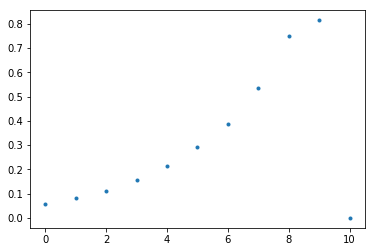

In [5]:
# Markov-pi + data-bunch
delta = 0.1
x_i, y_i = 1.0, 1.0
N_run = 1
N = 2**10

print('Markov-chain sampling')
print('δ={}, (x_i, y_i)=({}, {})'.format(delta, x_i, y_i))
print('N_run={}, N={}'.format(N_run, N))
print('\n{:3s} {:5s} {:10s} {:16s}'.format('Run', 'N_hit', 'Estimate of π', 'acceptance ratio'))

data = np.empty(N)
for run in range(N_run):
    x, y = x_i, y_i
    N_hit = 0
    accept = 0
    for i in range(N):
        dx = delta*(np.random.random()*2-1)
        dy = delta*(np.random.random()*2-1)
        if np.abs(x+dx) < 1 and np.abs(y+dy) < 1 :
            accept = accept + 1
            x = x + dx
            y = y + dy
        else:
            x = x
            y = y
        if x*x + y*y < 1 :
            N_hit = N_hit + 1
            data[i] = 1
        else:
            data[i] = 0
    print("{:^3d} {:^5d} {:^10.3f} {:^16f}".format(run+1, N_hit, N_hit/(N/4), accept/N))

# bunch
error = []
# print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
# print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
error.append(data.std()/np.sqrt(len(data)))

for b in range(14):
    N_new = N//2
    data_new = np.empty(N_new)
    for i in range(N_new):
        data_new[i] = (data[2*i] + data[2*i+1])/2
    data = data_new
    N = N_new
#     print('mean={:f}, std={:f}, error={:f}'.format(data.mean(), data.std(), data.std()/np.sqrt(len(data))))
#     print('mean={:f}, std={:f}, error={:f}'.format(4*data.mean(), 4*data.std(), 4*data.std()/np.sqrt(len(data))))
    error.append(data.std()/np.sqrt(len(data)))

error = np.array(error)
plt.plot(4*error, '.')